In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Задание 3

Нарисуйте график функции: y(x) = k∙cos(x – a) + b
для некоторых (2-3 различных) значений параметров k, a, b

In [2]:
x = np.linspace(-np.pi, np.pi, 201)
def f(x, k, a, b):
    return k*np.cos(x-a)+b

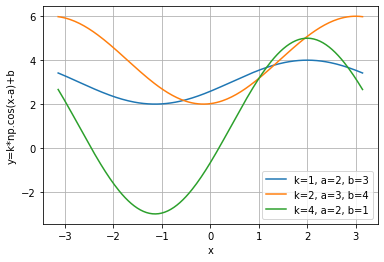

In [3]:
k, a, b = 1, 2, 3
plt.plot(x, f(x,k,a,b), label=f'k={k}, a={a}, b={b}')
k, a, b = 2, 3, 4
plt.plot(x, f(x,k,a,b), label=f'k={k}, a={a}, b={b}')
k, a, b = 4, 2, 1
plt.plot(x, f(x,k,a,b), label=f'k={k}, a={a}, b={b}')
plt.xlabel('x')
plt.ylabel('y=k*np.cos(x-a)+b')
plt.legend()
plt.grid()
plt.show()

3.2 Докажите, что при ортогональном преобразовании сохраняется расстояние между точками.

Примем координаты точки А на плоскости - (x1, y1), координаты точки В - (x2, y2).
Координаты этих же точек после ортогонального преобразования будут (X1, Y1) и (X2, Y2) соответсвенно.

In [4]:
x1, y1, x2, y2 = 3, 4, 7, 5

Произведем ортогональное преобразование, задав коэффициенты a11, a12, a13 для получения X1 и X2 из x1 и x2
и коэффициенты a21, a22, a23 для получения Y1 и Y2 из y1 и y2

In [5]:
a11, a12, a13, a21, a22, a23 = 0, 1, 4, 1, 0, 6

In [6]:
X1, Y1, X2, Y2 = (a11*x1 + a12*y1 + a13), (a21*x1 + a22*y1 + a23), (a11*x2 + a12*y2 + a13), (a21*x2 + a22*y2 + a23)

Проверим, что преобразование ортогонально:

In [7]:
print(a11**2 + a21**2 == 1)
print(a12**2 + a22**2 == 1)
print(a11*a12 + a21*a22 == 0)

True
True
True


Найдем длину вектора до и после преобразования:

In [8]:
A = np.array([x1,y1])
B = np.array([x2,y2])
C = B - A
len_1 = np.sqrt([C[0]**2+C[1]**2])

A2 = np.array([X1,Y1])
B2 = np.array([X2,Y2])
C2 = B2 - A2
len_2 = np.sqrt([C2[0]**2+C2[1]**2])

In [9]:
print(len_1 == len_2)

[ True]


Длины векторов равны --> при ортогональном преобразовании сохраняется расстояние между точками.

3.1 Напишите код, который будет переводить полярные координаты в декартовы

In [10]:
# R - радиус, a - угол в градусах
def polar_decart(R, a):
    x = R * np.cos(np.radians(a))
    y = R * np.sin(np.radians(a))
    return x, y

In [11]:
print(polar_decart(1, 30))

(0.8660254037844387, 0.49999999999999994)


Напишите код, который будет рисовать график окружности в полярных координатах.

In [12]:
def polar_circle(R=1):
    phi = np.linspace(0, 2 * np.pi, 201)
    r = np.linspace(R, R, 201)
    plt.polar(phi, r, color='green')
    plt.show()

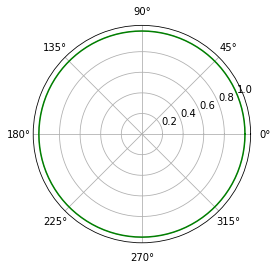

In [13]:
polar_circle()

Напишите код, который будет рисовать график прямой линии в полярных координатах.

In [14]:
def polar_line(R=1, a=45):
    phi = np.array([np.radians(a), np.radians(a)])
    r = np.array([0, R])
    plt.polar(phi, r)
    plt.show()

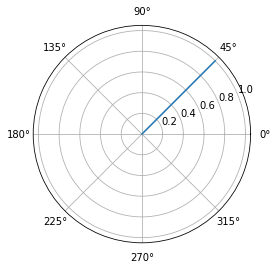

In [15]:
polar_line()

#### 4.1 Решите систему уравнений:  
   y = x^2 – 1  
   exp(x) + x * (1 – y) = 1

In [16]:
from scipy.optimize import fsolve

In [17]:
def f(p):
    x, y = p
    return y - x**2 + 1, np.exp(x) + x*(1-y) - 1

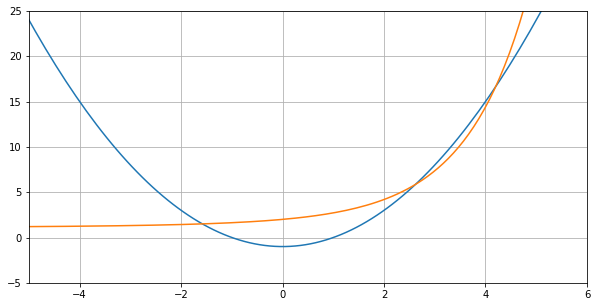

In [18]:
x=np.linspace(-10, 10, 200)
y= x**2 - 1
y2= 1 - (1-np.exp(x)) / x
plt.figure(figsize=[10, 5])
plt.ylim(-5, 25)
plt.xlim(-5, 6)
plt.plot(x, y)
plt.plot(x, y2)
plt.grid()
plt.show()

In [19]:
x1,y1 = fsolve(f, [-2,-1.5])
print(f'Корень 1: x1={x1}, y1={y1}')
x1,y1 = fsolve(f, [2,3])
print(f'Корень 2: x1={x1}, y1={y1}')
x1,y1 = fsolve(f, [4,5])
print(f'Корень 3: x1={x1}, y1={y1}')

Корень 1: x1=-1.5818353528695794, y1=1.5022030835372406
Корень 2: x1=2.618145573085453, y1=5.854686241866956
Корень 3: x1=4.200105841138739, y1=16.640889076869268


#### 4.2 Решите систему уравнений и неравенств:  
    y = x^2 – 1  
    exp(x) + x * (1 – y) > 1

In [20]:
import matplotlib.ticker as ticker

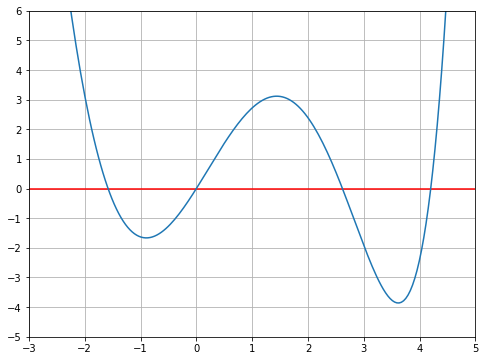

In [21]:
# np.exp(x) + x*(1-(x**2-1))-1  ==> np.exp(x) + 2*x - x**3 - 1
x = np.linspace(-3, 5, 200)
y = np.exp(x) + 2*x - x**3 - 1
fig, ax = plt.subplots()
ax.plot(x,  y)
ax.hlines(0, -3, 5, color = 'red')
ax.axis([-3, 5, -5, 6])
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
fig.set_figwidth(8)
fig.set_figheight(6)
ax.grid()
plt.show()

In [22]:
def f2(x):
    return np.exp(x) + 2*x - x**3 - 1

print(fsolve(f2, -2))
print(fsolve(f2, 0))
print(fsolve(f2, 2))
print(fsolve(f2, 4))

[-1.58183535]
[0.]
[2.61814557]
[4.20010584]


#### Система верна при:  
x < -1.58183535,  
0 < x < 2.61814557,  
x > 4.20010584